In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [264]:
def m(theta, alpha, p,N ):
    
    m_1=0
    m_2=0
    X=np.zeros((N))
    X[0]=0
    m_1=X[0]
    m_2=X[0]**2
    dN=1/N
    for i in range(0,N-1):
        
        m_1= X[i]*(1- theta*dN)
        
        m_2=  X[i]**2 + dN*2*(-X[i]**2*(theta+alpha*theta*p[i]*(1-p[i]) ) + \
                    X[i]*(alpha*theta*p[i]*(1-p[i])*(1-2*p[i] )) + \
                        alpha*theta*p[i]**2*(1-p[i])**2)
        #print('m1=',m_1)
        #print('m2=',m_2)
        a=m_1
        b=m_2 - m_1**2
        
        #print('mean=',a)
        #print('variance=',b)
        
        beta_param_alpha= - ( (1+a)*(a**2 +b -1)    )/(2*b)  
        beta_param_beta= ( (a-1)*(a**2 + b -1)  )  /(2*b)  
        
        #print(beta_param_alpha, beta_param_beta)
        
        X[i+1]=np.random.beta(beta_param_alpha,beta_param_beta,1)
        
        X[i+1]= -1 +  2*X[i+1]
        
        #print('X=',X[i+1])
        
    return(X)

In [381]:
def m(theta, alpha, p,N,M ):
    X=np.zeros((M,N))
    for j in range(0,M):   
        m_1=0
        m_2=0
        X[j,0]=0
        m_1=X[j,0]
        m_2=X[j,0]**2
        dN=1/N
        for i in range(0,N-1):

            m_1= X[j,i]*(1- theta*dN)

            m_2=  X[j,i]**2 + dN*2*(-X[j,i]**2*(theta+alpha*theta*p[i]*(1-p[i]) ) + \
                        X[j,i]*(alpha*theta*p[i]*(1-p[i])*(1-2*p[i] )) + \
                            alpha*theta*p[i]**2*(1-p[i])**2)
            #print('m1=',m_1)
            #print('m2=',m_2)
            a=m_1
            b=m_2 - m_1**2

            #print('mean=',a)
            #print('variance=',b)

            beta_param_alpha= - ( (1+a)*(a**2 +b -1)    )/(2*b)  
            beta_param_beta= ( (a-1)*(a**2 + b -1)  )  /(2*b)  

            #print(beta_param_alpha, beta_param_beta)

            X[j,i+1]=np.random.beta(beta_param_alpha,beta_param_beta,1)

            X[j,i+1]= -1 +  2*X[j,i+1]

            #print('X=',X[i+1])
        
    return(X)

In [413]:
N=100
M=50

theta=0.14
alpha=0.01

sandy=np.linspace(1e-3,10,N)
dN=1/N
forecast=lambda x: 0.5+0.25*np.sin(x)
p=forecast(sandy)

#p=np.ones((N))*0.5

Y=m(theta, alpha, p, N,M )

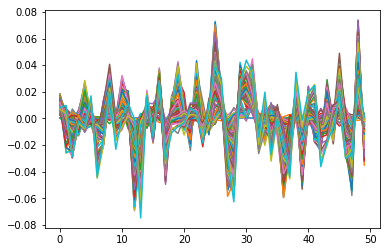

In [414]:
plt.plot(Y/p);